In [13]:
# importing requyired libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [14]:
# Laoding bike rental Data Set 
Data_loading=r'c:/Users/srika/New folder/Courses/Inderactive Data_/Final Project/Esha final Project/Bike rentl promotions/SeoulBikeData.csv'
df = pd.read_csv(Data_loading, encoding='ISO-8859-1')

#Reviewing Data Quality
#==========================
df.info() # overview of data types and null counts 
df.isnull().sum() # checking for missing values 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### Purpose of Date Conversion and Feature Extraction

The date conversion and feature extraction process enhances our ability to analyze trends in the data over time. By transforming the original `Date` column into specific time-related features, we can gain insights into patterns that may vary by day, month, or year. This breakdown allows us to:

1. **Understand Weekly Patterns:** Extracting the weekday provides a view into whether certain days are more prone to activity or specific events, helping us identify weekly cycles or patterns.

2. **Track Monthly and Annual Trends:** Isolating month and year enables us to explore seasonal or yearly fluctuations, allowing for analysis of long-term trends and potential seasonality.

3. **Simplify Data for Analysis:** Breaking down the date into separate columns improves the clarity and accessibility of the dataset, making it easier to conduct targeted analysis on specific time intervals (e.g., comparing weekends vs. weekdays).

By implementing these transformations, we set the foundation for a richer, time-based analysis, ultimately helping us pinpoint patterns and trends that inform more meaningful insights.

In [15]:
df.describe(include="all").T
# converting Date object
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

df["Weekday"]=df["Date"].dt.day_name()
df["Day"]=df["Date"].dt.day
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year

df.drop("Date",axis=1,inplace=True)

In [16]:

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Weekday                    8760 non-null   objec

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017


Trying to visualize the relationship between the temparature and the bike rentals that can further deepen the analysis.

### Goal: Understanding the Impact of Weather Conditions on Bike Rentals

The purpose of this analysis is to examine how temperature affects bike rentals, with a focus on identifying patterns based on different temperature categories (e.g., "Too Cold," "Moderate," "Too Hot"). By categorizing temperature ranges and analyzing the average bike rentals in each category, we can gain insights into how various weather conditions influence demand. Here’s how each step contributes to this goal:

1. **Binning Temperature Data:**  
   To make temperature data more interpretable, we segment it into bins. This allows us to observe how bike rentals change across small, consistent temperature intervals, helping to reveal trends in relation to specific temperature ranges.

2. **Categorizing Temperature Ranges:**  
   By defining categories like "Too Cold," "Moderate," and "Too Hot," we can evaluate how bike rentals respond to different weather conditions. These categories give a meaningful context to temperature ranges, which is essential for understanding comfort levels and their effects on bike rental behavior.

3. **Calculating Average Rentals per Temperature Bin:**  
   By grouping the data within each temperature bin and calculating the mean rentals, we focus on average demand within each range, filtering out any outliers that might skew individual values. This approach helps in identifying overall trends across temperature ranges.

4. **Color-Coding and Visualizing Results:**  
   Using color-coded bars in the bar chart enhances visual clarity, making it easier to distinguish between temperature categories and observe patterns. The color legend also adds an intuitive understanding of which temperature ranges correlate with higher or lower bike rentals.

5. **Adjusting Tick Labels for Readability:**  
   Reducing the number of x-tick labels shown and rotating them ensures that the graph remains clear and easy to read, even with numerous temperature bins. Adding data labels on top of each bar provides quick insights into average rentals without additional calculations.

### Expected Insights
This approach helps reveal how bike rental demand fluctuates with changing temperatures, with an emphasis on identifying optimal conditions for bike rentals. The analysis provides valuable insights for understanding seasonal or weather-based trends, which can inform operational strategies, marketing, and inventory planning for bike rental services.

Differentiating the te

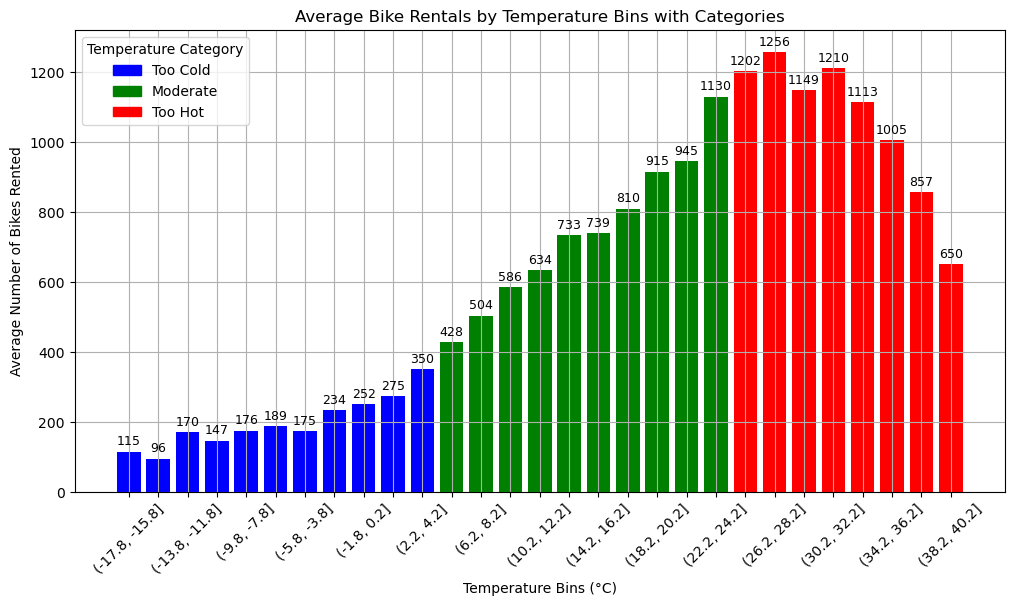

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define bins and labels based on temperature thresholds
temperature_bins = np.arange(df['Temperature(°C)'].min(), df['Temperature(°C)'].max() + 2, 2)
df['Temp Binned'] = pd.cut(df['Temperature(°C)'], bins=temperature_bins)

# Define temperature categories
def temperature_category(temp):
    if temp < 5:
        return "Too Cold"
    elif temp > 25:
        return "Too Hot"
    else:
        return "Moderate"

# Assign each bin a temperature category based on the midpoint of the bin
binned_data = df.groupby('Temp Binned')['Rented Bike Count'].mean().reset_index()
binned_data['Category'] = binned_data['Temp Binned'].apply(
    lambda x: temperature_category(x.mid)  # Midpoint of each bin
)

# Define colors based on categories
category_colors = {
    "Too Cold": 'blue',
    "Moderate": 'green',
    "Too Hot": 'red'
}
colors = [category_colors[cat] for cat in binned_data['Category']]

# Plot the bar chart with color-coded bars
plt.figure(figsize=(12, 6))
bars = plt.bar(binned_data['Temp Binned'].astype(str), binned_data['Rented Bike Count'], color=colors)
plt.title("Average Bike Rentals by Temperature Bins with Categories")
plt.xlabel("Temperature Bins (°C)")
plt.ylabel("Average Number of Bikes Rented")

# Add data labels on top of each bar
for bar, label in zip(bars, binned_data['Rented Bike Count']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 10,  # Position label slightly above the bar
        f'{label:.0f}', ha='center', va='bottom', fontsize=9, color='black'
    )

# Rotate x-ticks and reduce the number of labels shown
plt.xticks(rotation=45)
for i, label in enumerate(plt.gca().get_xticklabels()):
    if i % 2 != 0:  # Show every other tick
        label.set_visible(False)

# Add legend for the color categories
legend_elements = [
    mpatches.Patch(color='blue', label='Too Cold'),
    mpatches.Patch(color='green', label='Moderate'),
    mpatches.Patch(color='red', label='Too Hot')
]
plt.legend(handles=legend_elements, title="Temperature Category")

plt.grid(True)
plt.show()


### Understanding the Impact of Weather (Temperature and Rainfall) on Bike Rentals

This analysis explores how varying weather conditions, specifically temperature and rainfall, influence bike rental demand. By categorizing temperature and rainfall into meaningful bins and calculating the average bike rentals for each category, we aim to identify patterns in rental behavior based on weather variations.

---

#### 2. **Rainfall Analysis:**
   - **Binning Rainfall Data:**  
     Rainfall is segmented into four categories: "No Rain," "Light Rain," "Moderate Rain," and "Heavy Rain." These bins simplify the data and allow us to focus on how different rainfall levels impact rental activity.
   - **Calculating Average Rentals by Rainfall Category:**  
     By calculating the average rentals within each rainfall category, we gain a clearer view of typical demand under different precipitation conditions, reducing noise from any specific extreme data points.
   - **Visualizing Average Rentals per Rainfall Bin:**  
     The bar plot of average rentals across rainfall categories provides a visual representation of rental trends. By using labeled bins, it’s easy to see whether rentals decrease with heavier rainfall or remain stable in certain conditions.

---

### Why Average is the Suitable Metric
Using the **average** (mean) for each weather category is effective in this context because:

- **It Reduces Noise from Outliers:** Averages smooth out fluctuations caused by rare extreme events (e.g., unusually high rainfall or temperature spikes), providing a clearer view of typical rental behavior.
- **Shows Central Tendency:** The average highlights general rental demand under each weather condition, revealing typical patterns without overemphasizing anomalies.
- **Enhances Comparability Across Categories:** By using averages, we can compare weather categories consistently, making it easy to assess how each condition influences rental demand.
- **Supports Planning and Forecasting:** Averages help in identifying typical conditions (like "Moderate Rain" or "Too Cold") that correlate with higher or lower demand, offering practical insights for operational decision-making.

### Expected Insights
This analysis will reveal how bike rental demand fluctuates with changing weather, highlighting optimal conditions for rentals. Such insights are valuable for planning and forecasting, enabling targeted strategies for staffing, inventory management, and promotional efforts based on typical weather patterns.

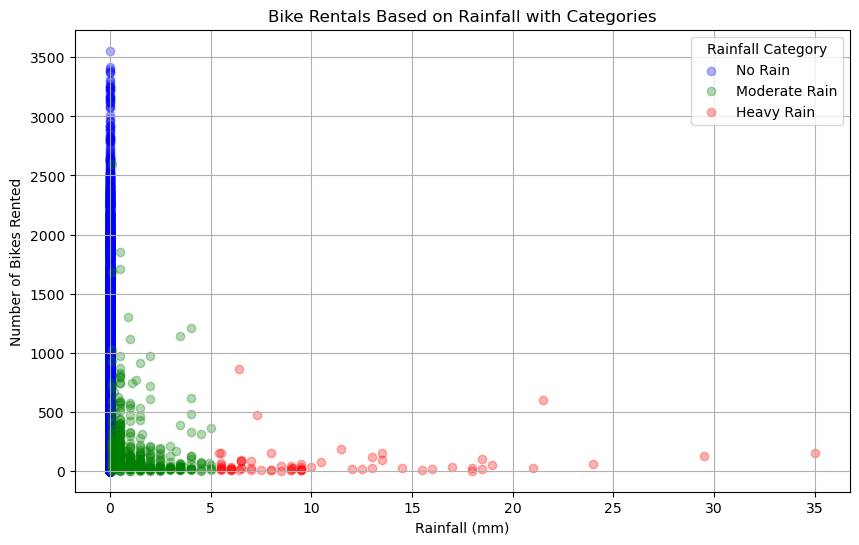

In [18]:
# Define categories for rainfall levels
def rainfall_category(rainfall):
    if rainfall == 0:
        return "No Rain"
    elif rainfall <= 5:
        return "Moderate Rain"
    else:
        return "Heavy Rain"

# Apply the function to create a new column in the dataset
df['Rainfall Category'] = df['Rainfall(mm)'].apply(rainfall_category)

# Scatter plot with color differentiation based on rainfall categories
plt.figure(figsize=(10, 6))
rainfall_colors = {'No Rain': 'blue', 'Moderate Rain': 'green', 'Heavy Rain': 'red'}
for category, color in rainfall_colors.items():
    subset = df[df['Rainfall Category'] == category]
    plt.scatter(subset['Rainfall(mm)'], subset['Rented Bike Count'], alpha=0.3, label=category, color=color)

plt.title("Bike Rentals Based on Rainfall with Categories")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Number of Bikes Rented")
plt.legend(title="Rainfall Category")
plt.grid(True)
plt.show()


In [19]:
import plotly.graph_objs as go

# Define a function to filter the data based on rainfall categories
def get_filtered_data(category):
    if category == "All":
        return df
    return df[df['Rainfall Category'] == category]

# Create the initial scatter plot with all data
fig = go.Figure()

# Add all data to the figure as the default view
fig.add_trace(
    go.Scatter(
        x=df['Rainfall(mm)'],
        y=df['Rented Bike Count'],
        mode='markers',
        marker=dict(
            size=8,
            color=df['Rainfall Category'].map({'No Rain': 'blue', 'Moderate Rain': 'green', 'Heavy Rain': 'red'}),
            opacity=0.6
        ),
        name='All Data'
    )
)

# Add dropdown buttons to filter by rainfall category
buttons = [
    dict(
        label="All",
        method="update",
        args=[
            {
                "x": [df['Rainfall(mm)']],
                "y": [df['Rented Bike Count']],
                "marker.color": [df['Rainfall Category'].map({'No Rain': 'blue', 'Moderate Rain': 'green', 'Heavy Rain': 'red'})],
            },
            {"title": "Bike Rentals Based on Rainfall (All Categories)"}
        ]
    )
]

# Generate dropdown options for each category
categories = df['Rainfall Category'].unique()
rainfall_colors = {'No Rain': 'blue', 'Moderate Rain': 'green', 'Heavy Rain': 'red'}
for category in categories:
    filtered_data = get_filtered_data(category)
    buttons.append(
        dict(
            label=category,
            method="update",
            args=[
                {
                    "x": [filtered_data['Rainfall(mm)']],
                    "y": [filtered_data['Rented Bike Count']],
                    "marker.color": rainfall_colors[category],
                },
                {"title": f"Bike Rentals Based on Rainfall (Category: {category})"}
            ]
        )
    )

# Add the layout and dropdown menu
fig.update_layout(
    title="Bike Rentals Based on Rainfall (All Categories)",
    xaxis_title="Rainfall (mm)",
    yaxis_title="Number of Bikes Rented",
    template="plotly_white",
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            direction="down",
            x=0.1,
            xanchor="left",
            y=1.2,
            yanchor="top"
        )
    ]
)

# Show the interactive plot
fig.show()


Similar to the analysis for rainfall, this approach examines how varying snowfall levels affect bike rentals. By categorizing snowfall as "No Snow," "Moderate Snow," and "Heavy Snow," we can observe rental trends under different snow conditions.

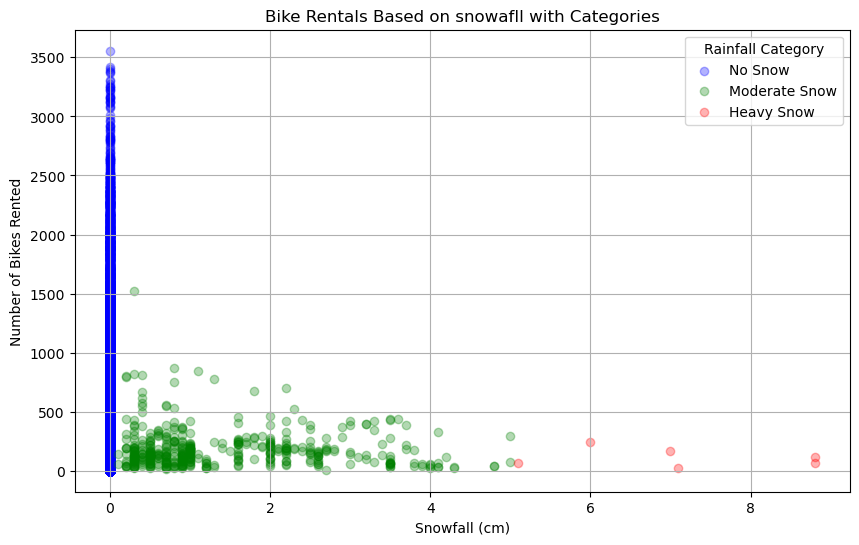

In [24]:
# Define categories for rainfall levels
def rainfall_category(rainfall):
    if rainfall == 0:
        return "No Snow"
    elif rainfall <= 5:
        return "Moderate Snow"
    else:
        return "Heavy Snow"

# Apply the function to create a new column in the dataset
df['Rainfall Category'] = df['Snowfall (cm)'].apply(rainfall_category)

# Scatter plot with color differentiation based on rainfall categories
plt.figure(figsize=(10, 6))
rainfall_colors = {'No Snow': 'blue', 'Moderate Snow': 'green', 'Heavy Snow': 'red'}
for category, color in rainfall_colors.items():
    subset = df[df['Rainfall Category'] == category]
    plt.scatter(subset['Snowfall (cm)'], subset['Rented Bike Count'], alpha=0.3, label=category, color=color)

plt.title("Bike Rentals Based on snowafll with Categories")
plt.xlabel("Snowfall (cm)")
plt.ylabel("Number of Bikes Rented")
plt.legend(title="Rainfall Category")
plt.grid(True)
plt.show()

In [21]:
import plotly.graph_objs as go

# Define categories for snowfall levels
def snowfall_category(snowfall):
    if snowfall == 0:
        return "No Snow"
    elif snowfall <= 5:
        return "Moderate Snow"
    else:
        return "Heavy Snow"

# Apply the function to create a new column in the dataset
df['Snowfall Category'] = df['Snowfall (cm)'].apply(snowfall_category)

# Create the initial scatter plot with all data
fig = go.Figure()

# Add all data to the figure as the default view
fig.add_trace(
    go.Scatter(
        x=df['Snowfall (cm)'],
        y=df['Rented Bike Count'],
        mode='markers',
        marker=dict(
            size=8,
            color=df['Snowfall Category'].map({'No Snow': 'blue', 'Moderate Snow': 'green', 'Heavy Snow': 'red'}),
            opacity=0.6
        ),
        name='All Data'
    )
)

# Add dropdown buttons to filter by snowfall category
buttons = [
    dict(
        label="All",
        method="update",
        args=[
            {
                "x": [df['Snowfall (cm)']],
                "y": [df['Rented Bike Count']],
                "marker.color": [df['Snowfall Category'].map({'No Snow': 'blue', 'Moderate Snow': 'green', 'Heavy Snow': 'red'})],
            },
            {"title": "Bike Rentals Based on Snowfall (All Categories)"}
        ]
    )
]

# Generate dropdown options for each category
categories = df['Snowfall Category'].unique()
snowfall_colors = {'No Snow': 'blue', 'Moderate Snow': 'green', 'Heavy Snow': 'red'}
for category in categories:
    filtered_data = df[df['Snowfall Category'] == category]
    buttons.append(
        dict(
            label=category,
            method="update",
            args=[
                {
                    "x": [filtered_data['Snowfall (cm)']],
                    "y": [filtered_data['Rented Bike Count']],
                    "marker.color": snowfall_colors[category],
                },
                {"title": f"Bike Rentals Based on Snowfall (Category: {category})"}
            ]
        )
    )

# Add the layout and dropdown menu
fig.update_layout(
    title="Bike Rentals Based on Snowfall (All Categories)",
    xaxis_title="Snowfall (cm)",
    yaxis_title="Number of Bikes Rented",
    template="plotly_white",
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            direction="down",
            x=0.1,
            xanchor="left",
            y=1.2,
            yanchor="top"
        )
    ]
)

# Show the interactive plot
fig.show()


### Weekly Bike Rental Demand Analysis

---

#### Data Analysis
- **Grouping by Weekday:** 
  - The data is grouped by days of the week to calculate the total bike rentals for each day.
  - Days are arranged in chronological order from Monday to Sunday for better readability.
- **Demand Categories:** 
  - Days are categorized into **low**, **moderate**, and **high demand** based on rental thresholds.
  - Each day is assigned a color:
    - **Blue:** Low Demand
    - **Green:** Moderate Demand
    - **Red:** High Demand


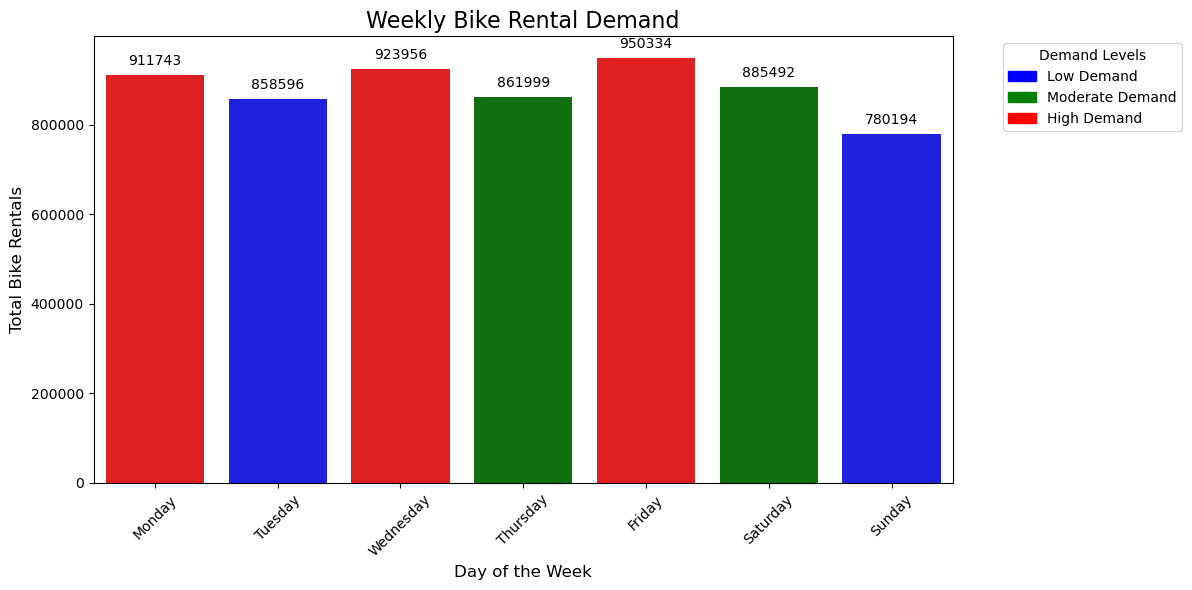

In [22]:
# Group the data by weekday to calculate total rentals
weekday_demand = df.groupby('Weekday')['Rented Bike Count'].sum().reset_index()

# Ensure the days are in order (Monday to Sunday)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_demand['Weekday'] = pd.Categorical(weekday_demand['Weekday'], categories=weekday_order, ordered=True)
weekday_demand = weekday_demand.sort_values('Weekday')

# Rename columns for better readability
weekday_demand.columns = ['Weekday', 'Total Bike Rentals']

# Define color categories based on thresholds (low, moderate, high demand)
def assign_color(value):
    if value <= weekday_demand['Total Bike Rentals'].quantile(0.33):
        return 'blue'  # Too Cold
    elif value <= weekday_demand['Total Bike Rentals'].quantile(0.66):
        return 'green'  # Moderate
    else:
        return 'red'  # Too Hot

# Add color category to the data
weekday_demand['Color'] = weekday_demand['Total Bike Rentals'].apply(assign_color)

# Plotting the weekly bike rental demand
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=weekday_demand, x='Weekday', y='Total Bike Rentals', palette=weekday_demand['Color'])

# Adding data labels to the bars
for bar in ax.patches:
    ax.annotate(
        format(bar.get_height(), '.0f'),  # Format number without decimals
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position at the center of the bar
        ha='center', va='bottom',  # Align text
        fontsize=10, color='black', xytext=(0, 5),  # Slightly above the bar
        textcoords='offset points'
    )

# Adding a legend for the color categories and placing it outside the plot
legend_elements = [
    mpatches.Patch(color='blue', label='Low Demand'),
    mpatches.Patch(color='green', label='Moderate Demand'),
    mpatches.Patch(color='red', label='High Demand')
]
plt.legend(handles=legend_elements, title='Demand Levels', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

# Adjusting the canvas size to fit the legend
plt.subplots_adjust(right=0.8)

# Setting titles and labels
plt.title('Weekly Bike Rental Demand', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Bike Rentals', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Seasonal Bike Rental Trends

---

#### Data Analysis
- **Grouping by Season:**
  - The data is grouped by seasons to calculate the total number of bike rentals for each season.
  - Seasons are arranged in chronological order: **Autumn**, **Spring**, **Summer**, **Winter** for clarity.
- **Demand Categories:**
  - Seasons are categorized into **low**, **moderate**, and **high demand** based on rental thresholds.
  - Each season is assigned a color:
    - **Blue:** Low Demand
    - **Green:** Moderate Demand
    - **Red:** High Demand


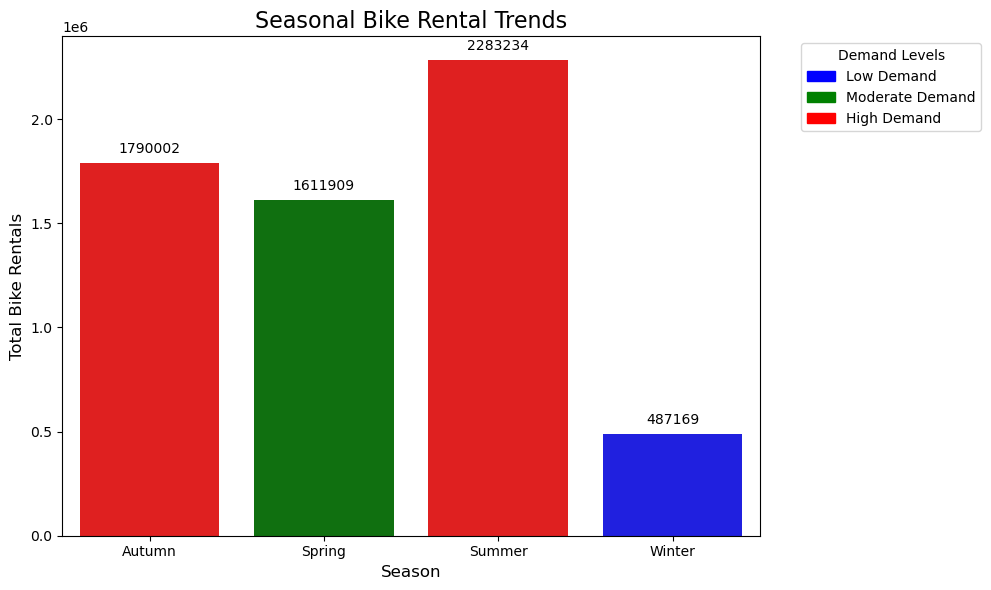

In [23]:
# Group the data by season to calculate total rentals
seasonal_demand = df.groupby('Seasons')['Rented Bike Count'].sum().reset_index()

# Ensure the seasons are in order
season_order = ['Autumn', 'Spring', 'Summer', 'Winter']
seasonal_demand['Seasons'] = pd.Categorical(seasonal_demand['Seasons'], categories=season_order, ordered=True)
seasonal_demand = seasonal_demand.sort_values('Seasons')

# Rename columns for better readability
seasonal_demand.columns = ['Seasons', 'Total Bike Rentals']

# Define color categories based on thresholds (low, moderate, high demand)
def assign_color(value):
    if value <= seasonal_demand['Total Bike Rentals'].quantile(0.33):
        return 'blue'  # Too Cold (Low Demand)
    elif value <= seasonal_demand['Total Bike Rentals'].quantile(0.66):
        return 'green'  # Moderate Demand
    else:
        return 'red'  # Too Hot (High Demand)

# Add color category to the data
seasonal_demand['Color'] = seasonal_demand['Total Bike Rentals'].apply(assign_color)

# Plotting the seasonal bike rental demand
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=seasonal_demand, x='Seasons', y='Total Bike Rentals', palette=seasonal_demand['Color'])

# Adding data labels to the bars
for bar in ax.patches:
    ax.annotate(
        format(bar.get_height(), '.0f'),  # Format number without decimals
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position at the center of the bar
        ha='center', va='bottom',  # Align text
        fontsize=10, color='black', xytext=(0, 5),  # Slightly above the bar
        textcoords='offset points'
    )

# Adding a legend for the color categories and placing it outside the plot
legend_elements = [
    mpatches.Patch(color='blue', label='Low Demand'),
    mpatches.Patch(color='green', label='Moderate Demand'),
    mpatches.Patch(color='red', label='High Demand')
]
plt.legend(handles=legend_elements, title='Demand Levels', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

# Adjusting the canvas size to fit the legend
plt.subplots_adjust(right=0.8)

# Setting titles and labels
plt.title('Seasonal Bike Rental Trends', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Bike Rentals', fontsize=12)
plt.tight_layout()
plt.show()